##SUMMARY

Fraud  Loan Prediction 

Whether to give loan to a person or not based on the information .

Train the model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
fraud=pd.read_csv('/Users/drram/Documents/loan_prediction.csv')
fraud

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
fraud.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
fraud.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
fraud.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

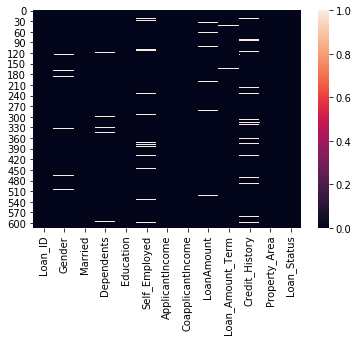

In [7]:
sns.heatmap(fraud.isnull())

#Filling missing data.

In [8]:
#filling null values of categorical data
fraud['LoanAmount'].fillna(fraud['LoanAmount'].mean(),inplace=True)

In [9]:
fraud['Loan_Amount_Term'].fillna(fraud['Loan_Amount_Term'].mean(),inplace=True)
fraud['Credit_History'].fillna(fraud['Credit_History'].mean(),inplace=True)

In [10]:
#filling null values of numerical data
fraud['Gender']=fraud['Gender'].fillna(fraud['Gender'].mode()[0])
fraud['Married']=fraud['Married'].fillna(fraud['Married'].mode()[0])
fraud['Dependents']=fraud['Dependents'].fillna(fraud['Dependents'].mode()[0])
fraud['Self_Employed']=fraud['Self_Employed'].fillna(fraud['Self_Employed'].mode()[0])

In [11]:
fraud.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

##Univariate Analysis

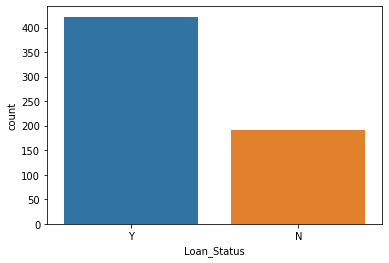

In [12]:
sns.countplot(fraud['Loan_Status'])

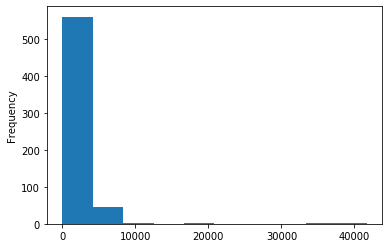

In [13]:
fraud['CoapplicantIncome'].plot.hist()

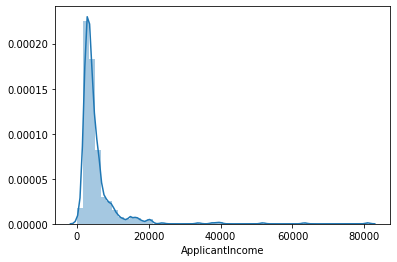

In [14]:
sns.distplot(fraud['ApplicantIncome'])

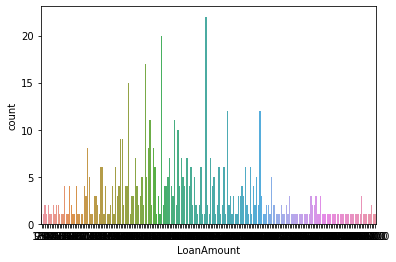

In [15]:
sns.countplot(fraud['LoanAmount'])

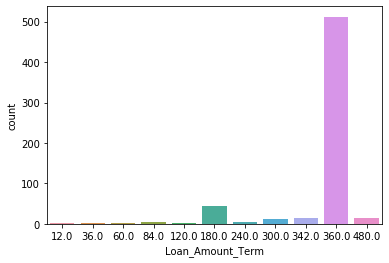

In [16]:
sns.countplot(fraud['Loan_Amount_Term'])

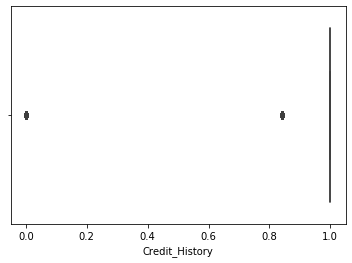

In [17]:
sns.boxplot(fraud['Credit_History'], data=fraud)

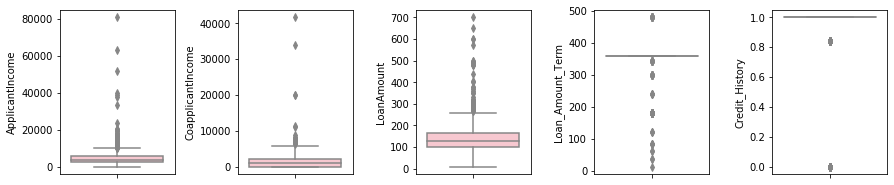

In [18]:
col_list=fraud.columns.values
plt.figure(figsize=(15,15))
for i in range (0,len(col_list)):
    if fraud[col_list[i]].dtype!='O':
        plt.subplot(6,6,i+1)
        sns.boxplot(fraud[col_list[i]], color='pink',orient='v')
        plt.tight_layout()

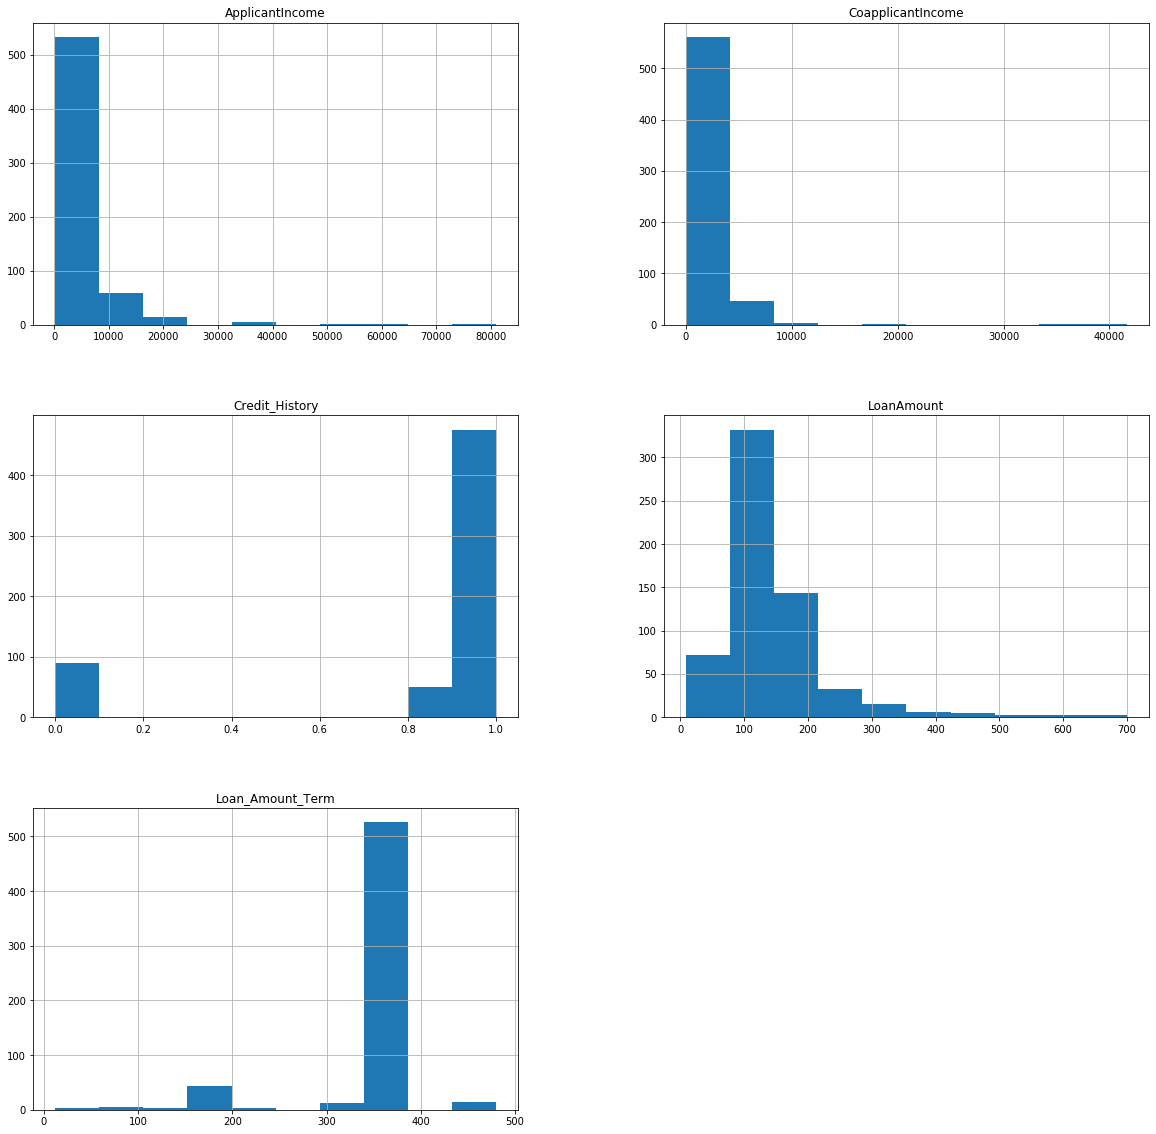

In [19]:
fraud.hist(figsize=(20,20))
plt.show()

##Bivariate Analysis

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
fraud['Loan_Status']=pd.DataFrame(le.fit_transform(fraud['Loan_Status']))

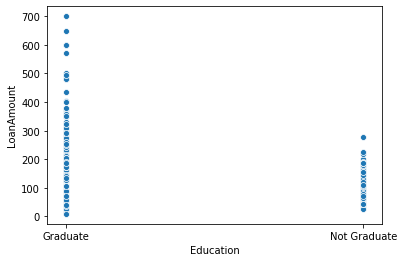

In [21]:
sns.scatterplot(x='Education',y='LoanAmount', data= fraud)

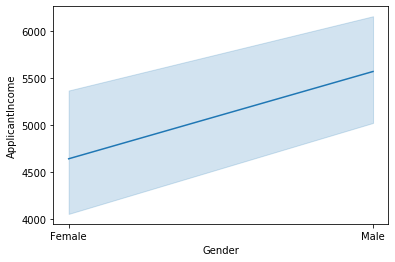

In [22]:
sns.lineplot(x='Gender',y='ApplicantIncome',data=fraud)

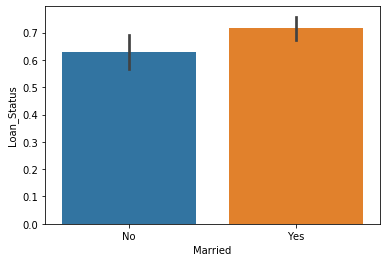

In [23]:
sns.barplot(x='Married', y='Loan_Status', data= fraud)

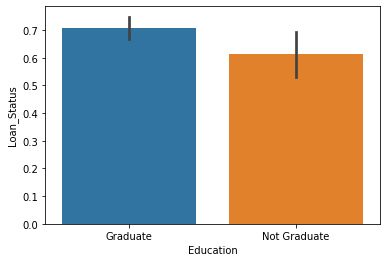

In [24]:
sns.barplot(x='Education',y='Loan_Status', data= fraud)

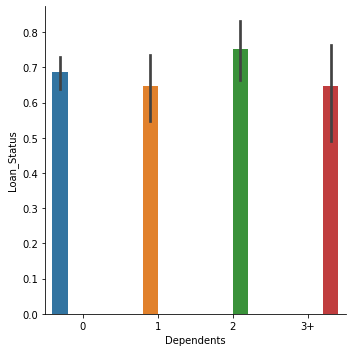

In [25]:
sns.catplot(x="Dependents", y="Loan_Status", hue="Dependents", kind="bar", data=fraud);

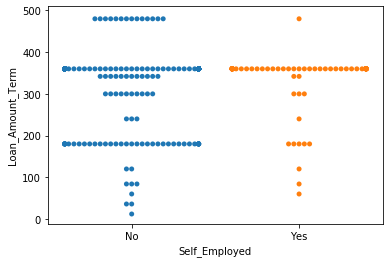

In [26]:
sns.swarmplot(x='Self_Employed',y='Loan_Amount_Term',data=fraud)

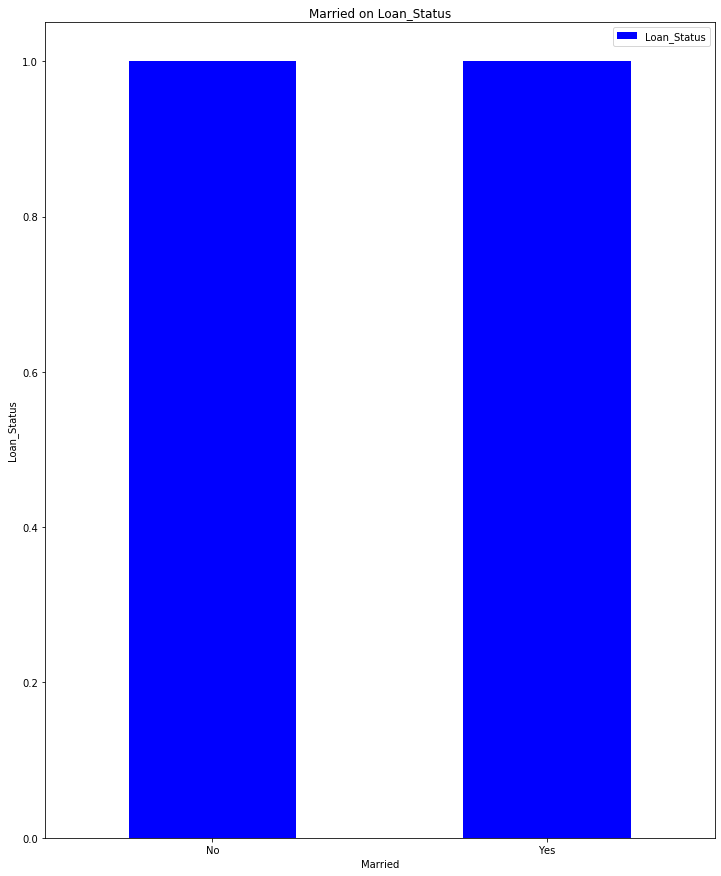

In [27]:
Married_pivot=\
fraud.pivot_table(index='Married',values='Loan_Status',aggfunc=np.median)
Married_pivot.plot(kind='bar',color='blue',figsize=(12,15))
plt.xlabel('Married')
plt.ylabel('Loan_Status')
plt.title('Married on Loan_Status')
plt.xticks(rotation=0)
plt.show()

##Statistical Analysis

In [28]:
#we need to change all the categorical values into numerical values
for i in fraud.columns:
    if fraud.columns.dtype=='O':
        fraud[i]=le.fit_transform(fraud[i])

In [29]:
fraud.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,376,0,100,9,2,2,1
1,1,1,1,1,0,0,306,60,81,9,2,0,0
2,2,1,1,0,0,1,139,0,26,9,2,2,1
3,3,1,1,0,1,0,90,160,73,9,2,2,1
4,4,1,0,0,0,0,381,0,94,9,2,2,1


In [30]:
#Loan_ID is of no such use in dataset, so we can drop this column
fraud.drop(['Loan_ID'], axis=1, inplace=True)

In [31]:
fraud.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,247.117264,78.884365,87.719870,8.526059,1.628664,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,143.537853,92.623999,45.670174,1.404423,0.724018,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,120.250000,0.000000,53.250000,9.000000,2.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,244.500000,33.500000,82.000000,9.000000,2.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,369.750000,153.750000,116.750000,9.000000,2.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,504.000000,286.000000,203.000000,10.000000,2.000000,2.000000,1.000000


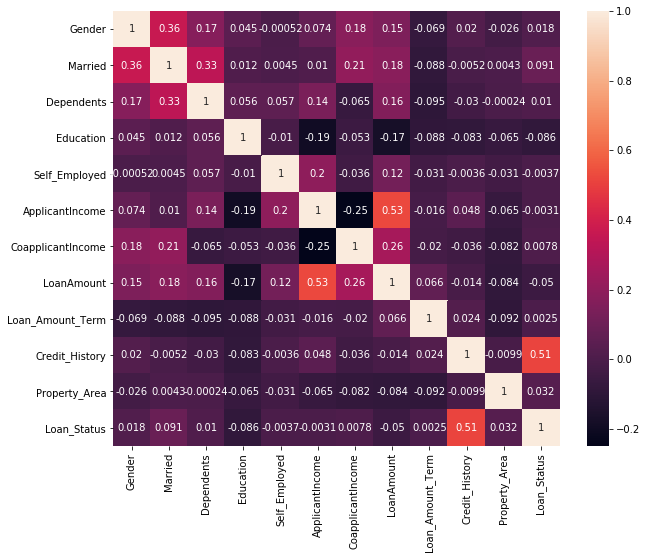

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(fraud.corr(), annot=True)

In [33]:
fraud.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.074223,0.180774,0.151163,-0.069368,0.019882,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.010497,0.207905,0.184857,-0.087657,-0.005177,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.137382,-0.065140,0.161153,-0.094810,-0.029681,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.190873,-0.052724,-0.172249,-0.088487,-0.083070,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.199142,-0.036033,0.117717,-0.031174,-0.003643,-0.030860,-0.003700
ApplicantIncome,0.074223,0.010497,0.137382,-0.190873,0.199142,1.000000,-0.248763,0.525324,-0.016402,0.048375,-0.065143,-0.003123
CoapplicantIncome,0.180774,0.207905,-0.065140,-0.052724,-0.036033,-0.248763,1.000000,0.264136,-0.020010,-0.036084,-0.082223,0.007812
LoanAmount,0.151163,0.184857,0.161153,-0.172249,0.117717,0.525324,0.264136,1.000000,0.065580,-0.014301,-0.084076,-0.049717
Loan_Amount_Term,-0.069368,-0.087657,-0.094810,-0.088487,-0.031174,-0.016402,-0.020010,0.065580,1.000000,0.023971,-0.091598,0.002512
Credit_History,0.019882,-0.005177,-0.029681,-0.083070,-0.003643,0.048375,-0.036084,-0.014301,0.023971,1.000000,-0.009898,0.513319


#observations-
1. Loan_status is positively corr with 'gender','married status','dependents','property area',credit_history','loan_amount_term', and negatively corr with all other columns..

##Further Analysis of the data

In [34]:
fraud.groupby('Loan_Status').mean()
#1=yes, 0=No

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,,,,,,
0,0.807292,0.588542,0.729167,0.270833,0.135417,247.781250,77.812500,91.083333,8.520833,1.078125,1.000000
1,0.822275,0.682464,0.751185,0.194313,0.132701,246.815166,79.372038,86.189573,8.528436,1.879147,1.054502


observations-
1. Loan_Status has no affect on gender, self_employed, applicantincome, loan_amount_term.
2. but married will get loan as compared to un-married, dependents will get easily as compared to others, having some credit_history will get easily.

In [35]:
fraud.pivot_table(values=('Gender','Married'), index='Credit_History')

,Gender,Married
Credit_History,,
0,0.808989,0.640449
1,0.780000,0.720000
2,0.823158,0.648421


##Removing outliers and skewness

In [36]:
#remove outliers and skewness
print("The shape before removing outliers and skewness", fraud.shape)

print("skewness before removing outliers")

print(fraud.skew())

from scipy.stats import zscore
z=np.abs(zscore(fraud))
fraud=fraud[(z<3).all(axis=1)]
print("new shape after removing outliers", fraud.shape)
print("skewness after removing outliers")
print(fraud.skew())

The shape before removing outliers and skewness (614, 12)
skewness before removing outliers
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.040993
CoapplicantIncome    0.780870
LoanAmount           0.458715
Loan_Amount_Term    -2.907201
Credit_History      -1.606726
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64
new shape after removing outliers (602, 12)
skewness after removing outliers
Gender              -1.646147
Married             -0.643625
Dependents           1.027516
Education            1.372199
Self_Employed        2.189792
ApplicantIncome      0.037182
CoapplicantIncome    0.772613
LoanAmount           0.471894
Loan_Amount_Term    -2.668469
Credit_History      -1.590563
Property_Area       -0.058757
Loan_Status         -0.803760
dtype: float64


In [37]:
#reducing skewness using sqrt function
for col in fraud.columns:
    if fraud.skew().loc[col]>0.55:
        fraud[col]=np.sqrt(fraud[col])

In [38]:
fraud.skew()

Gender              -1.646147
Married             -0.643625
Dependents           0.581356
Education            1.372199
Self_Employed        2.189792
ApplicantIncome      0.037182
CoapplicantIncome    0.256659
LoanAmount           0.471894
Loan_Amount_Term    -2.668469
Credit_History      -1.590563
Property_Area       -0.058757
Loan_Status         -0.803760
dtype: float64

In [39]:
#further little reducing skewness using log1p function
for col in fraud.columns:
    if fraud.skew().loc[col]>0.55:
        fraud[col]=np.log1p(fraud[col])

In [40]:
fraud.skew()

Gender              -1.646147
Married             -0.643625
Dependents           0.470884
Education            1.372199
Self_Employed        2.189792
ApplicantIncome      0.037182
CoapplicantIncome    0.256659
LoanAmount           0.471894
Loan_Amount_Term    -2.668469
Credit_History      -1.590563
Property_Area       -0.058757
Loan_Status         -0.803760
dtype: float64

##Splitting the data into target and input

In [41]:
x=fraud.drop('Loan_Status', axis=1)
x.head()
y=pd.DataFrame(fraud.Loan_Status)
y.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [42]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.000000,0.000000,0.000000,376,0.000000,100,9,2,2
1,1,1,0.693147,0.000000,0.000000,306,7.745967,81,9,2,0
2,1,1,0.000000,0.000000,0.693147,139,0.000000,26,9,2,2
3,1,1,0.000000,0.693147,0.000000,90,12.649111,73,9,2,2
4,1,0,0.000000,0.000000,0.000000,381,0.000000,94,9,2,2


In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,0.000000,0.0,0.0,0.746032,0.000000,0.492611,0.8,1.0,1.0
1,1.0,1.0,0.689663,0.0,0.0,0.607143,0.458029,0.399015,0.8,1.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.275794,0.000000,0.128079,0.8,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.178571,0.747958,0.359606,0.8,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.755952,0.000000,0.463054,0.8,1.0,1.0


##Importing necessary libraries

In [44]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

##Finding out the best random_state

In [45]:
def max_accuracy(reg,x,y):
    max_acc_score=0
    for r_state in range(42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        acc_score=accuracy_score(test_y,pred)
        print("The accuracy score achieved at r state", r_state, "is", acc_score)
        if acc_score>max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print("The maximum accuracy", max_acc_score, "is achieved at random state", final_r_state)
    return max_acc_score

In [46]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
max_accuracy(lg,x,y)

The accuracy score achieved at r state 42 is 0.8429752066115702
The accuracy score achieved at r state 43 is 0.8264462809917356
The accuracy score achieved at r state 44 is 0.8181818181818182
The accuracy score achieved at r state 45 is 0.743801652892562
The accuracy score achieved at r state 46 is 0.8016528925619835
The accuracy score achieved at r state 47 is 0.7355371900826446
The accuracy score achieved at r state 48 is 0.7933884297520661
The accuracy score achieved at r state 49 is 0.7520661157024794
The accuracy score achieved at r state 50 is 0.8016528925619835
The accuracy score achieved at r state 51 is 0.7603305785123967
The accuracy score achieved at r state 52 is 0.743801652892562
The accuracy score achieved at r state 53 is 0.7933884297520661
The accuracy score achieved at r state 54 is 0.8264462809917356
The accuracy score achieved at r state 55 is 0.8264462809917356
The accuracy score achieved at r state 56 is 0.8099173553719008
The accuracy score achieved at r state 57 

0.8677685950413223

In [47]:
#checking the cross val score
score=cross_val_score(lg,x,y,cv=5).mean()
print("The cross val score is", round(score,2))

The cross val score is 0.79


In [48]:
#Finalising the train test data
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=59,test_size=0.20)

In [49]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(481, 11)
(481, 1)
(121, 11)
(121, 1)


In [50]:
#Let us use the other classification models and for the same let us use GridSearchCV to bring out the best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy'), 'splitter':('best','random')}
gddt=GridSearchCV(dt,parameters)
gddt.fit(train_x,train_y)
gddt.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [51]:
from sklearn.svm import SVC
sv=SVC()
parameters={'C':(1,10),'kernel':('linear','poly','rbf')}
gdsv=GridSearchCV(sv,parameters)
gdsv.fit(train_x,train_y)
gdsv.best_params_

{'C': 1, 'kernel': 'rbf'}

In [52]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':(5,10,15,20),'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')}
gdkn=GridSearchCV(kn,parameters)
gdkn.fit(train_x,train_y)
gdkn.best_params_

{'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'uniform'}

In [53]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
parameters={'penalty':('l1','l2')}
gd=GridSearchCV(lg,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'penalty': 'l2'}

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The accuracy score is  0.7603305785123967

The cross val score is 0.7940633608815426

              precision    recall  f1-score   support

           0       0.73      0.31      0.43        36
           1       0.76      0.95      0.85        85

    accuracy                           0.76       121
   macro avg       0.75      0.63      0.64       121
weighted avg       0.75      0.76      0.72       121


[[11 25]
 [ 4 81]]

roc_auc_score 0.6292483660130719


AxesSubplot(0.125,0.808774;0.62x0.0712264)




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
         

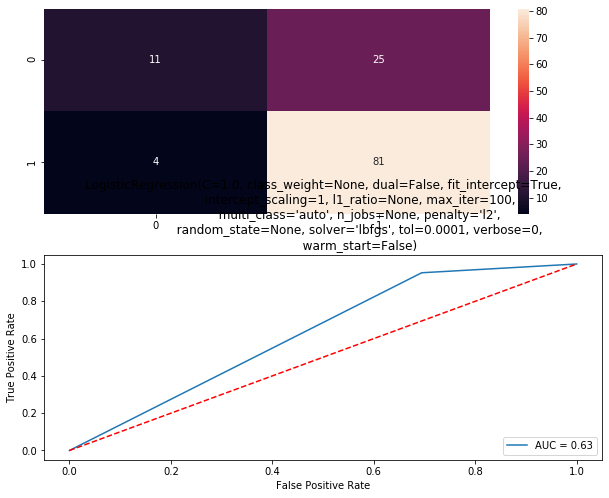

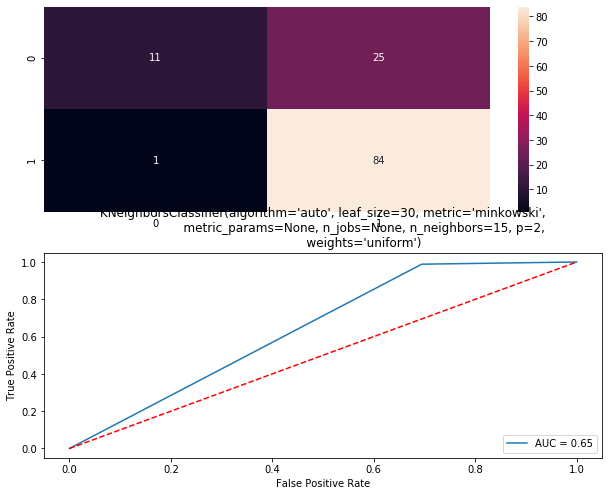

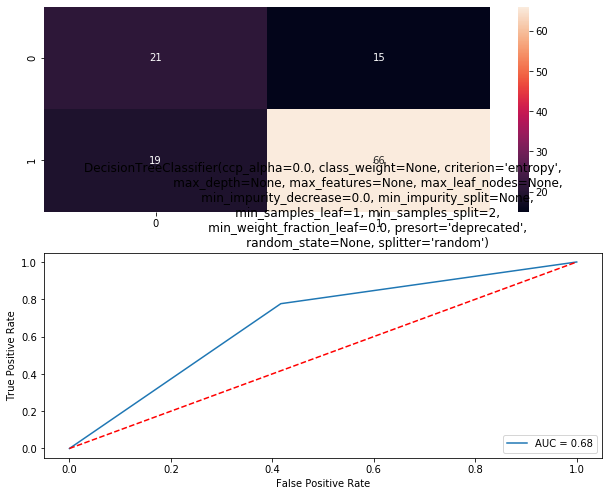

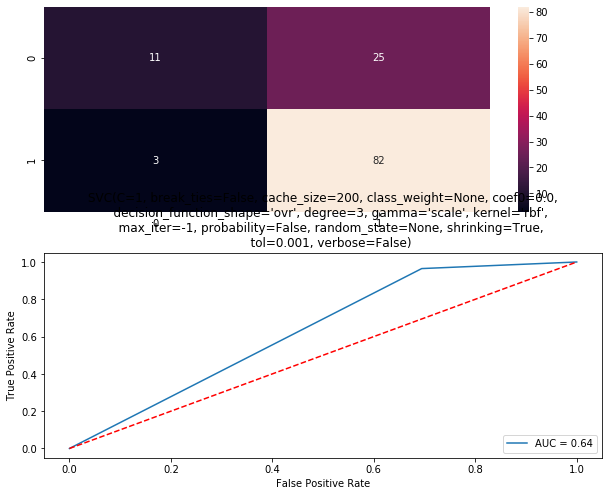

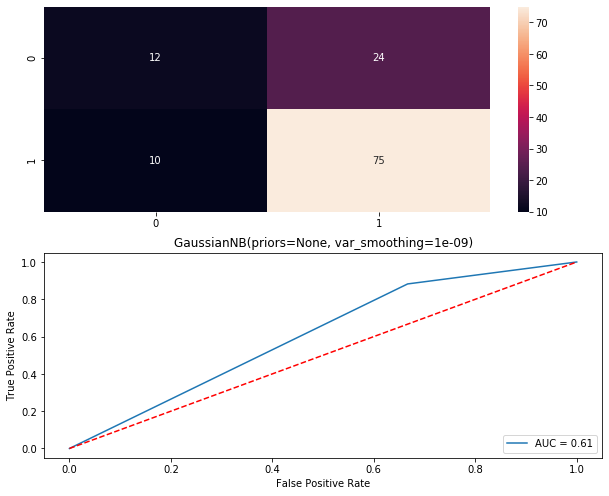

In [54]:
#After obtaining best parameters, we should now check the models
score=[]
cv=[]
rocscore=[]

from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression

algorithms=[LogisticRegression(penalty='l2'),KNeighborsClassifier(algorithm='auto', n_neighbors= 15, weights='uniform'), DecisionTreeClassifier(criterion= 'entropy', splitter= 'random'), SVC(C=1, kernel='rbf'),GaussianNB()]

for i in algorithms:
    print(i)
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    accscore=accuracy_score(test_y,pred)
    score.append(accscore)
    print("")
    print("The accuracy score is ", accscore)
    print("")
    cvscore=cross_val_score(i,x,y,cv=5,scoring='accuracy').mean()
    cv.append(cvscore)
    print("The cross val score is", cvscore)
    print()
    print(classification_report(test_y,pred))
    print()
    cm=confusion_matrix(test_y,pred)
    print(cm)
    print()
    false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print("\n")
    print("\n")

In [55]:
result=pd.DataFrame({'Model':[LogisticRegression,KNeighborsClassifier, DecisionTreeClassifier, SVC,GaussianNB],'Accuracy_Score':score,'Cross_val_score':cv, 'AUC_ROC':rocscore})
result

,Model,Accuracy_Score,Cross_val_score,AUC_ROC
0,<class 'sklearn.linear_model._logistic.Logisti...,0.760331,0.794063,0.629248
1,<class 'sklearn.neighbors._classification.KNei...,0.785124,0.794091,0.646895
2,<class 'sklearn.tree._classes.DecisionTreeClas...,0.719008,0.706088,0.679902
3,<class 'sklearn.svm._classes.SVC'>,0.768595,0.807369,0.635131
4,<class 'sklearn.naive_bayes.GaussianNB'>,0.719008,0.772438,0.607843


In [56]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=90,test_size=0.20)
sv=SVC(C=1, kernel='rbf')
sv.fit(train_x,train_y)
pred=sv.predict(test_x)
acs=accuracy_score(test_y,pred)
print("The accuracy score is", acs)
cs=cross_val_score(sv,x,y,cv=5).mean()
print("The cross val score is", cs)
predxls=pd.DataFrame(pred).to_csv("prediction.csv")

The accuracy score is 0.7603305785123967
The cross val score is 0.8073691460055097


In [57]:
# Let us try to boost the model to get more accuracy score
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
parameters={'n_estimators':(10,50,100,200,500)}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(train_x,train_y)
gdrf.best_params_

{'n_estimators': 100}

In [58]:
#checking the best accuracy score and random state for RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200)
max_accuracy(rf,x,y)

The accuracy score achieved at r state 42 is 0.8429752066115702
The accuracy score achieved at r state 43 is 0.7933884297520661
The accuracy score achieved at r state 44 is 0.8264462809917356
The accuracy score achieved at r state 45 is 0.7520661157024794
The accuracy score achieved at r state 46 is 0.8512396694214877
The accuracy score achieved at r state 47 is 0.768595041322314
The accuracy score achieved at r state 48 is 0.8264462809917356
The accuracy score achieved at r state 49 is 0.743801652892562
The accuracy score achieved at r state 50 is 0.7768595041322314
The accuracy score achieved at r state 51 is 0.7603305785123967
The accuracy score achieved at r state 52 is 0.7933884297520661
The accuracy score achieved at r state 53 is 0.8099173553719008
The accuracy score achieved at r state 54 is 0.8181818181818182
The accuracy score achieved at r state 55 is 0.8264462809917356
The accuracy score achieved at r state 56 is 0.8099173553719008
The accuracy score achieved at r state 57 

0.8512396694214877

In [59]:
#checking the cross val score
cs=cross_val_score(rf,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score of Random forest classifier is", cs)

The cross val score of Random forest classifier is 0.7924242424242424


In [60]:
from sklearn.ensemble import GradientBoostingClassifier
gc=GradientBoostingClassifier()
parameters={'learning_rate':(0.001,0.01,0.1,1),'n_estimators':(50,100,200,500),'criterion':('friedman_mse', 'mse', 'mae')}
gd=GridSearchCV(gc,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'criterion': 'friedman_mse', 'learning_rate': 0.001, 'n_estimators': 500}

In [61]:
#checking the best accuracy score and random state for RandomForestClassifier
gc=GradientBoostingClassifier(criterion='mae', learning_rate= 1, n_estimators= 100)
max_accuracy(gc,x,y)

The accuracy score achieved at r state 42 is 0.8347107438016529
The accuracy score achieved at r state 43 is 0.8181818181818182
The accuracy score achieved at r state 44 is 0.8264462809917356
The accuracy score achieved at r state 45 is 0.7520661157024794
The accuracy score achieved at r state 46 is 0.8347107438016529
The accuracy score achieved at r state 47 is 0.7768595041322314
The accuracy score achieved at r state 48 is 0.8181818181818182
The accuracy score achieved at r state 49 is 0.7520661157024794
The accuracy score achieved at r state 50 is 0.8016528925619835
The accuracy score achieved at r state 51 is 0.7851239669421488
The accuracy score achieved at r state 52 is 0.8016528925619835
The accuracy score achieved at r state 53 is 0.7933884297520661
The accuracy score achieved at r state 54 is 0.8429752066115702
The accuracy score achieved at r state 55 is 0.8181818181818182
The accuracy score achieved at r state 56 is 0.7933884297520661
The accuracy score achieved at r state 5

0.8677685950413223

In [62]:
#checking the cross val score
cs=cross_val_score(gc,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score of GradientBoosting classifier is", cs)

The cross val score of GradientBoosting classifier is 0.7941046831955924


In [63]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
parameters={'learning_rate':(0.001,0.01,0.1,1),'n_estimators':(50,100,200,500),'algorithm':('SAMME', 'SAMME.R')}
gd=GridSearchCV(ad,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 50}

In [64]:
#checking the best accuracy score and random state for AdaBoostClassifier
gc=AdaBoostClassifier(algorithm= 'SAMME', learning_rate= 0.001, n_estimators= 50)
max_accuracy(gc,x,y)

The accuracy score achieved at r state 42 is 0.8347107438016529
The accuracy score achieved at r state 43 is 0.8429752066115702
The accuracy score achieved at r state 44 is 0.8264462809917356
The accuracy score achieved at r state 45 is 0.7520661157024794
The accuracy score achieved at r state 46 is 0.8347107438016529
The accuracy score achieved at r state 47 is 0.7768595041322314
The accuracy score achieved at r state 48 is 0.8347107438016529
The accuracy score achieved at r state 49 is 0.7603305785123967
The accuracy score achieved at r state 50 is 0.8016528925619835
The accuracy score achieved at r state 51 is 0.7851239669421488
The accuracy score achieved at r state 52 is 0.8016528925619835
The accuracy score achieved at r state 53 is 0.7933884297520661
The accuracy score achieved at r state 54 is 0.8429752066115702
The accuracy score achieved at r state 55 is 0.8347107438016529
The accuracy score achieved at r state 56 is 0.8429752066115702
The accuracy score achieved at r state 5

0.8842975206611571

In [65]:
#checking the cross val score
cs=cross_val_score(ad,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score of AdaBoost classifier is", cs)

The cross val score of AdaBoost classifier is 0.7874242424242424


In [66]:
result2=pd.DataFrame({'Boosters':['RandomForestClassifier','GradientBoostClassifier','AdaBoostRegressor'],'Accuracy Score':[0.867,0.878,0.874],'Cross_val_score':[0.84,0.85,0.85]})
result2

,Boosters,Accuracy Score,Cross_val_score
0,RandomForestClassifier,0.867,0.84
1,GradientBoostClassifier,0.878,0.85
2,AdaBoostRegressor,0.874,0.85


In [67]:
result

,Model,Accuracy_Score,Cross_val_score,AUC_ROC
0,<class 'sklearn.linear_model._logistic.Logisti...,0.760331,0.794063,0.629248
1,<class 'sklearn.neighbors._classification.KNei...,0.785124,0.794091,0.646895
2,<class 'sklearn.tree._classes.DecisionTreeClas...,0.719008,0.706088,0.679902
3,<class 'sklearn.svm._classes.SVC'>,0.768595,0.807369,0.635131
4,<class 'sklearn.naive_bayes.GaussianNB'>,0.719008,0.772438,0.607843


In [68]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=90,test_size=0.20)
gc=GradientBoostingClassifier(criterion='mae', learning_rate= 1, n_estimators= 100)
gc.fit(train_x,train_y)
pred=gc.predict(test_x)
acs=accuracy_score(test_y,pred)
print("The accuracy score is", acs)
cs=cross_val_score(gc,x,y,cv=5).mean()
print("The cross val score is", cs)
pd.DataFrame(pred).to_csv("Fraud_loan_prediction.csv")

The accuracy score is 0.768595041322314
The cross val score is 0.7891046831955923


In [69]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=90,test_size=0.20)
sv=SVC(C=1, kernel='rbf')
sv.fit(train_x,train_y)
pred=sv.predict(test_x)
acs=accuracy_score(test_y,pred)
print("The accuracy score is", acs)
cs=cross_val_score(sv,x,y,cv=5).mean()
print("The cross val score is", cs)
pd.DataFrame(pred).to_csv("Fraud_loan_prediction.csv")

The accuracy score is 0.7603305785123967
The cross val score is 0.8073691460055097


##By comparing the results, we can conclude that SVC is giving better results wrt Accuracy score and cross val score. Let us finalise the same.

In [70]:
from sklearn.externals import joblib
joblib.dump(sv,"fraud.pkl")

['fraud.pkl']